# Data

## Data Inormation

This is a data set containing 10 classes of colour images of size 32 × 32 pixels. The training set is perfectly balanced, with 6,000 images per class. The test set contains 10,000 instances. This Note book looks to train an MLP and a CNN for the classification task and compare their performance. 

## Setup

In [1]:
from data_loader import DataLoader
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt


### Loading Data

In [12]:
# According to the CIFAR-10 website, the training set is split into five batches
# stored in fives files. Each colour image has dimensions equal to 32 x 32 x 3. There
# are 10 classes.
image_width, image_height, image_Nchannels = 32, 32, 3
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']



# The default values of all the arguments of the load_batch function have been
# set for the CIFAR-10 dataset.
X_train, y_train = DataLoader.load_batch('data_batch')
X_test, y_test = DataLoader.load_batch('test_batch', Nbatches=1)

In [13]:
from sklearn.model_selection import train_test_split
X_train, y_train = DataLoader.load_batch('data_batch')
X_test, y_test = DataLoader.load_batch('test_batch', Nbatches=1)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.15, random_state=42)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

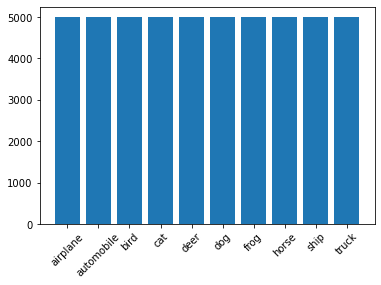

In [4]:
## Inspecting training  set


y_train_count = []
for i in range(max(y_train+1)):
    y_train_count.append(list(y_train).count(i))

# inspecting the distribution of the test set
plt.bar(class_names, y_train_count)
plt.xticks(rotation = 45)

All classes have the same number of elements, hence training should not affected by the number of items in a given class but only the model's ability to differentiate the different classes

#### Sampler

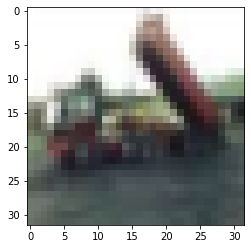

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])


In [24]:
def sampler(X,y, cl_name = class_names,num_portraits=20):
    import matplotlib.pyplot as plt
    import numpy as np
    from numpy import random as ran
    from matplotlib.pyplot import figure
    random_set = ran.random_integers(0,len(y),num_portraits)
    fig, ax = plt.subplots(4,int(np.ceil(num_portraits/4)),figsize=(15,15))
    i = 0
    for row in ax:
        for col in row:
            
            col.imshow(X[random_set[i]])
            col.set_title(cl_name[y[random_set[i]]])
            i+=1

    


#### Train set sample plots

C:\Users\jcary\AppData\Local\Temp\ipykernel_14224\2872367818.py:6: DeprecationWarning: This function is deprecated. Please call randint(0, 50000 + 1) instead
  random_set = ran.random_integers(0,len(y),num_portraits)


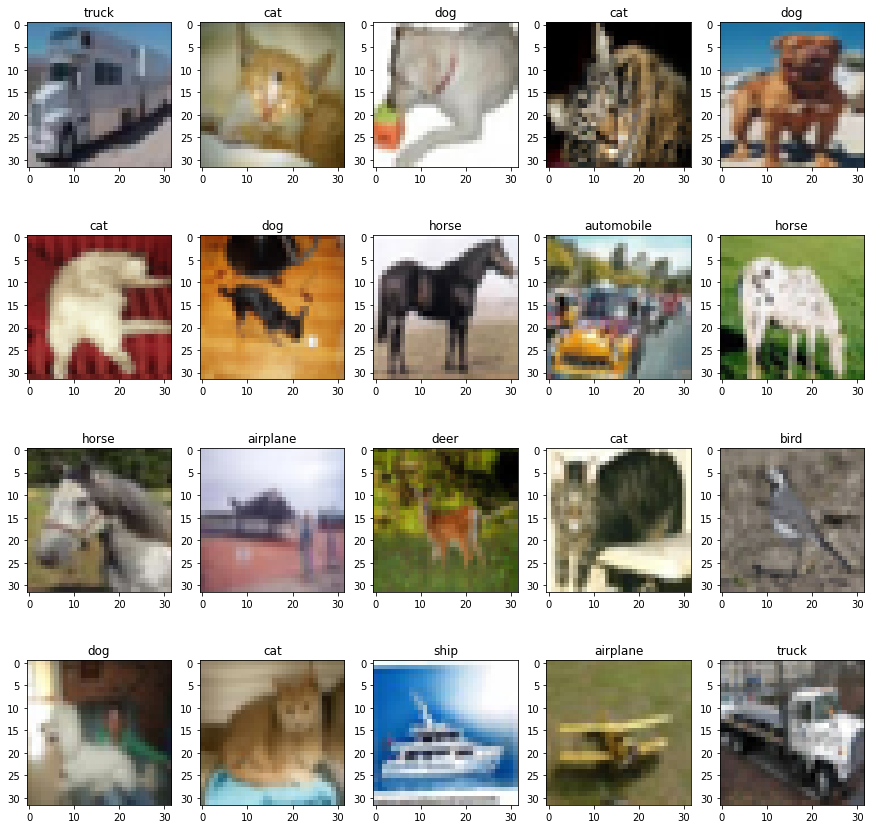

In [26]:
sampler(X_train, y_train )

#### Test sample plots

C:\Users\jcary\AppData\Local\Temp\ipykernel_14224\2872367818.py:6: DeprecationWarning: This function is deprecated. Please call randint(0, 1500 + 1) instead
  random_set = ran.random_integers(0,len(y),num_portraits)


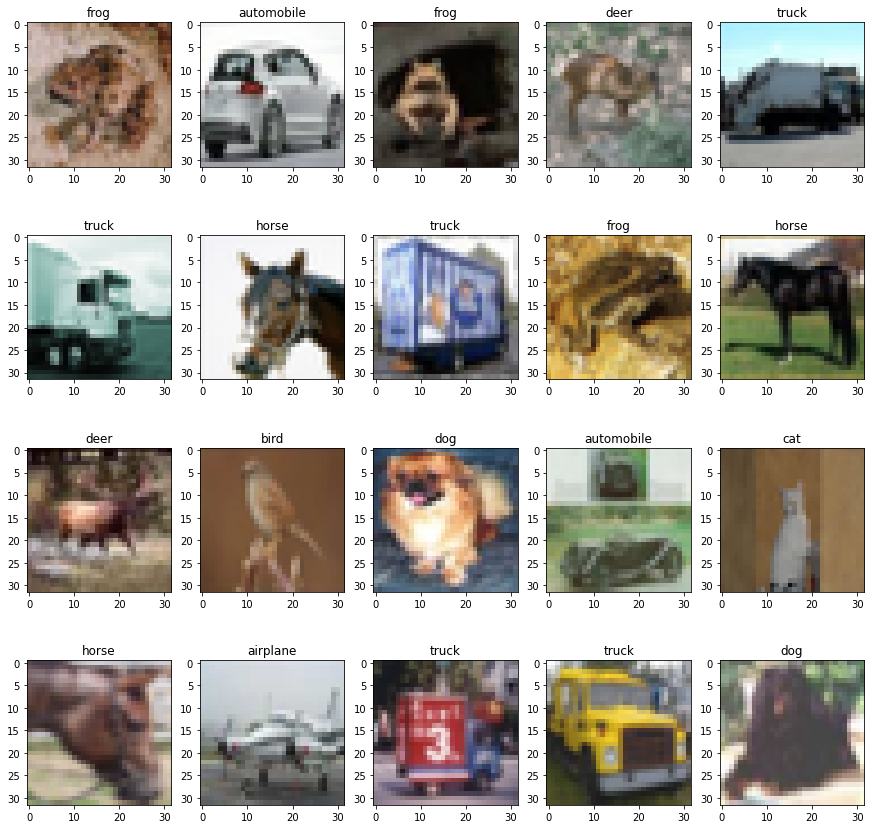

In [27]:
sampler(X_test, y_test )

Validation set sample plots

C:\Users\jcary\AppData\Local\Temp\ipykernel_14224\2872367818.py:6: DeprecationWarning: This function is deprecated. Please call randint(0, 8500 + 1) instead
  random_set = ran.random_integers(0,len(y),num_portraits)


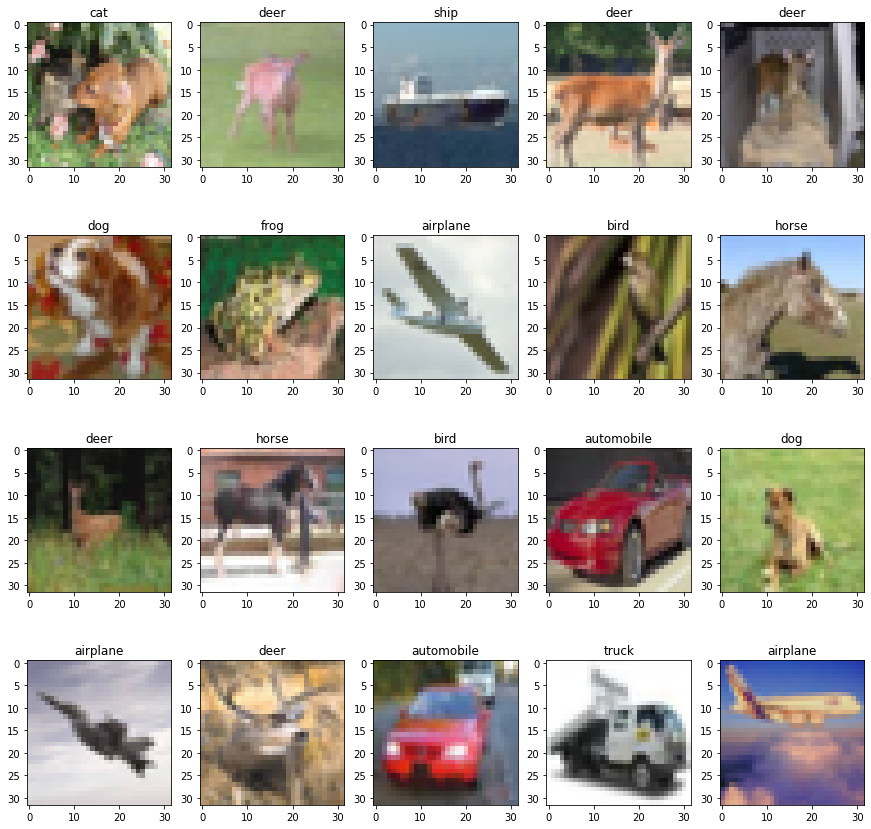

In [28]:
sampler(X_val, y_val )

#### Helper function

In [152]:
import os
root_logdir = os.path.join(os.curdir, "my_logs_mlp")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
root_logdir = os.path.join(os.curdir, "my_logs_mlp")
run_logdir = get_run_logdir() # e.g., ’./my_logs/run_2020_04_17-15_15_22’
# Build and compile your model
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

def create_model_cnn( k_size, act, filter1, filter2, filter3 ):
    model = keras.models.Sequential([
    keras.layers.Conv2D(filters=filter1, kernel_size = k_size,activation=act, padding="same",
    input_shape=[32, 32, 3]),
    keras.layers.MaxPooling2D(pool_size = k_size),
    keras.layers.Conv2D(filters=filter2,kernel_size = k_size, activation=act, padding="same"),
    keras.layers.MaxPooling2D(pool_size = k_size),
    keras.layers.Conv2D(filters=filter3, kernel_size = k_size, activation=act, padding="same"),
    keras.layers.MaxPooling2D(pool_size = k_size),
    keras.layers.Flatten(),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation=act),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
    ])
    model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
    return model

def create_model(dropout = 0, initializer = "he_normal" ):
    model = keras.models.Sequential(
        [
        keras.layers.Flatten(input_shape=[32, 32, 3]),
        keras.layers.Dropout(rate =  dropout),
        keras.layers.Dense(300, activation="relu", kernel_initializer = initializer),
        keras.layers.Dropout(rate =  dropout),
        keras.layers.Dense(100, activation="relu", kernel_initializer = initializer),
        keras.layers.Dropout(rate =  dropout),
        keras.layers.Dense(100, activation="relu", kernel_initializer = initializer),
        keras.layers.Dropout(rate =  dropout),
        keras.layers.Dense(10, activation="softmax")
        ]
    )
    model.compile(loss="sparse_categorical_crossentropy",  metrics=["accuracy"])
    return model

def exponential_decay(lr0, s):
    def exp_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exp_decay_fn


my_exp_decay_fn_30 = exponential_decay(lr0=0.001, s=30)
my_exp_decay_fn_90 = exponential_decay(lr0=0.0001, s=90)
lr_scheduler_30 = keras.callbacks.LearningRateScheduler(my_exp_decay_fn_30)
lr_scheduler_90 = keras.callbacks.LearningRateScheduler(my_exp_decay_fn_90)

### Model

#### MLP

param_grid = [

  { 'dropout': [0.2, 0.5], 
    "callbacks" : [lr_scheduler_30, lr_scheduler_90],
   'initializer': ["he_uniform", "he_normal"]
  }
  
 ]

Wrap the model to allow for parameter tuning using grid search.

from keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn=create_model, epochs=100)

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

grid.fit(X_train,y_train)

grid.best_params_

Best parameters:
* Exponential Learnig rate scheduler with initiail learning rate at 0.09 and steps at 90.
* Dropout rate of 0.2.
* He Uniform connection weight initializer.

In [ ]:
try:
    best_MLP = keras.models.load_model("Sigar_Sigar_MLP.h5")
    history = best_MLP.fit(X_train, y_train, epochs = 1,  validation_data=(X_val, y_val) , 
                           callbacks=[lr_scheduler_90, tensorboard_cb])
        
except OSError:
    if len(tf.config.list_physical_devices('GPU')):
        with tf.device(tf.test.gpu_device_name()):    
            best_MLP = create_model(dropout = 0.2, initializer = "he_uniform" )
            history = best_MLP.fit(X_train, y_train, epochs = 100,  validation_data=(X_val, y_val) , 
                                   callbacks=[lr_scheduler_90, tensorboard_cb])
    else:
        best_MLP = create_model(dropout = 0.2, initializer = "he_uniform" )
        history = best_MLP.fit(X_train, y_train, epochs = 100,  validation_data=(X_val, y_val) ,
                               callbacks=[lr_scheduler_90, tensorboard_cb])


In [98]:
# MODEL SUMMARY
best_MLP.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dropout (Dropout)            (None, 3072)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 300)               921900    
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 100)               30100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 100)              

In [84]:
best_MLP.save("Sigar_Sigar_MLP.h5")

### Model Evaluation

In [76]:
# function for ploting identified classes
def plot(X,y, sub_row = 2, sub_col = 2 ,cl_name = class_names,num_portraits=4):
    import matplotlib.pyplot as plt
    import numpy as np
    from numpy import random as ran
    from matplotlib.pyplot import figure
    random_set = ran.random_integers(0,len(y),num_portraits)
    fig, ax = plt.subplots(sub_row,sub_col,figsize=(15,15))
    i = 0
    for row in ax:
        if i < num_portraits:
            for col in row:
                if i < num_portraits:
                    col.imshow(X[random_set[i]])
                    col.set_title(cl_name[y[random_set[i]]])
                    i+=1
                else:
                    break


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

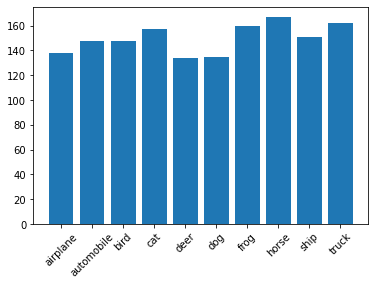

In [191]:
import matplotlib.pyplot as plt

y_test_count = []
for i in range(max(y_test+1)):
    y_test_count.append(list(y_test).count(i))

# inspecting the distribution of the test set
plt.bar(class_names, y_test_count)
plt.xticks(rotation = 45)


The test classes are evenly distributed thus accuracy can be used in the assesment of the model.

In [49]:
import numpy as np
y_pred = np.argmax(best_MLP.predict(X_test), axis=-1)

In [103]:
from sklearn.metrics import classification_report
c_report_mlp = classification_report(y_test, y_pred, target_names=class_names)
print(c_report_mlp)

              precision    recall  f1-score   support

    airplane       0.59      0.55      0.57       138
  automobile       0.75      0.57      0.65       148
        bird       0.36      0.35      0.36       148
         cat       0.40      0.35      0.37       157
        deer       0.35      0.56      0.43       134
         dog       0.44      0.33      0.38       135
        frog       0.46      0.59      0.52       160
       horse       0.69      0.52      0.59       167
        ship       0.65      0.76      0.70       151
       truck       0.60      0.57      0.58       162

    accuracy                           0.52      1500
   macro avg       0.53      0.52      0.52      1500
weighted avg       0.53      0.52      0.52      1500



Genereally speaking the model is correct around half the time with especially poor perfomance when detecting birds, cats deers and dogs.

<AxesSubplot:>

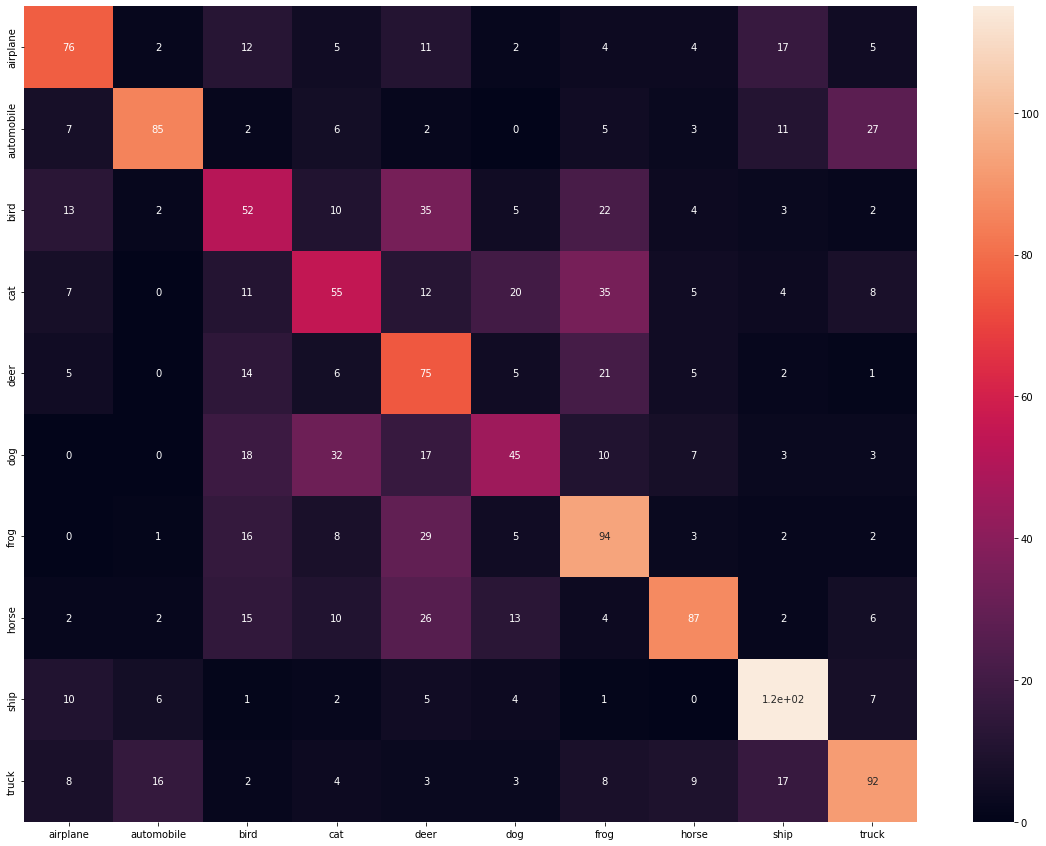

In [138]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred, labels=)
fig, ax = plt.subplots(figsize=(20,15)) 
# using absolute value
sns.heatmap(conf_mat, annot= True, xticklabels = class_names, yticklabels= class_names)

A more in depth looks shows ships are the most well identified class whilst dogs, cats and birds are the worst. Moreover, animals tend to get misclassified as other animals more often than machines. E.G. birds are more often misclassified as deers or frogs, cats as dogs or frogs, and dogs as birds cats or deers. Additionally, machines tend to be misclassifed as other machine more often than animals E.G. Airplanes as ships, automobiles as truck and trucks as ships.
For fasle postives, deers are the most misclassidied class followed closely by Frogs and birds, where as horses fall on the bottom of the list.
With regards to false negatives, cats and birds top the list for most misclassified class whilst ships are the least misclassified class.

##### Correctly identified classes plot

C:\Users\jcary\AppData\Local\Temp\ipykernel_14224\348054402.py:7: DeprecationWarning: This function is deprecated. Please call randint(0, 776 + 1) instead
  random_set = ran.random_integers(0,len(y),num_portraits)


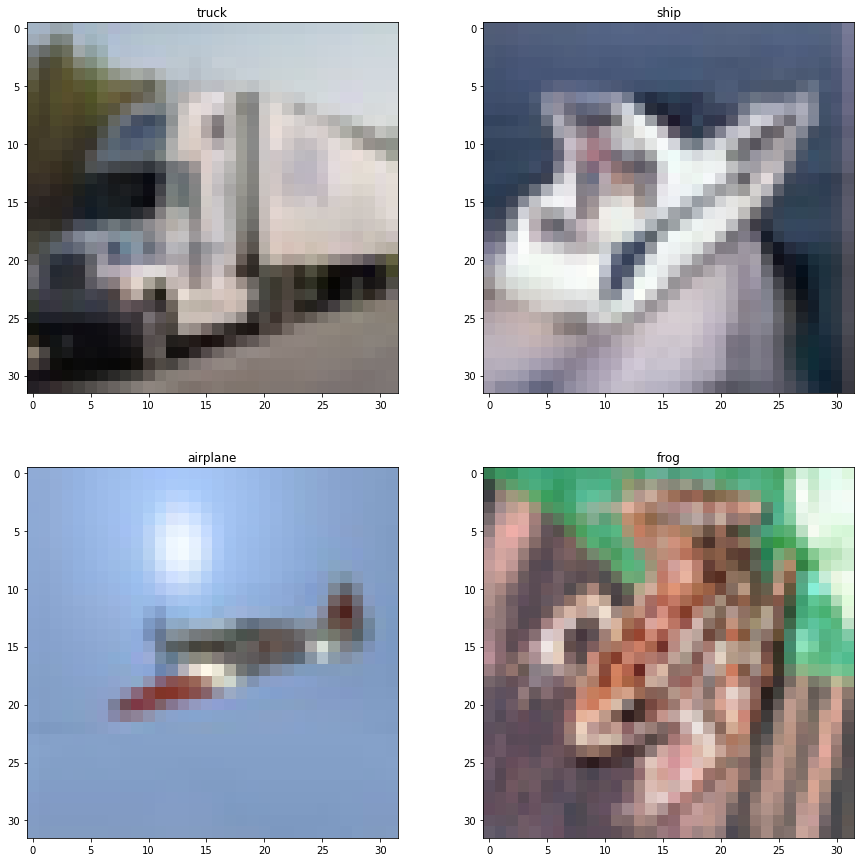

In [77]:
plot(X=X_test[y_pred == y_test], y=y_pred[y_pred == y_test])

##### Incorrectly identified classes plot

C:\Users\jcary\AppData\Local\Temp\ipykernel_14224\348054402.py:7: DeprecationWarning: This function is deprecated. Please call randint(0, 724 + 1) instead
  random_set = ran.random_integers(0,len(y),num_portraits)


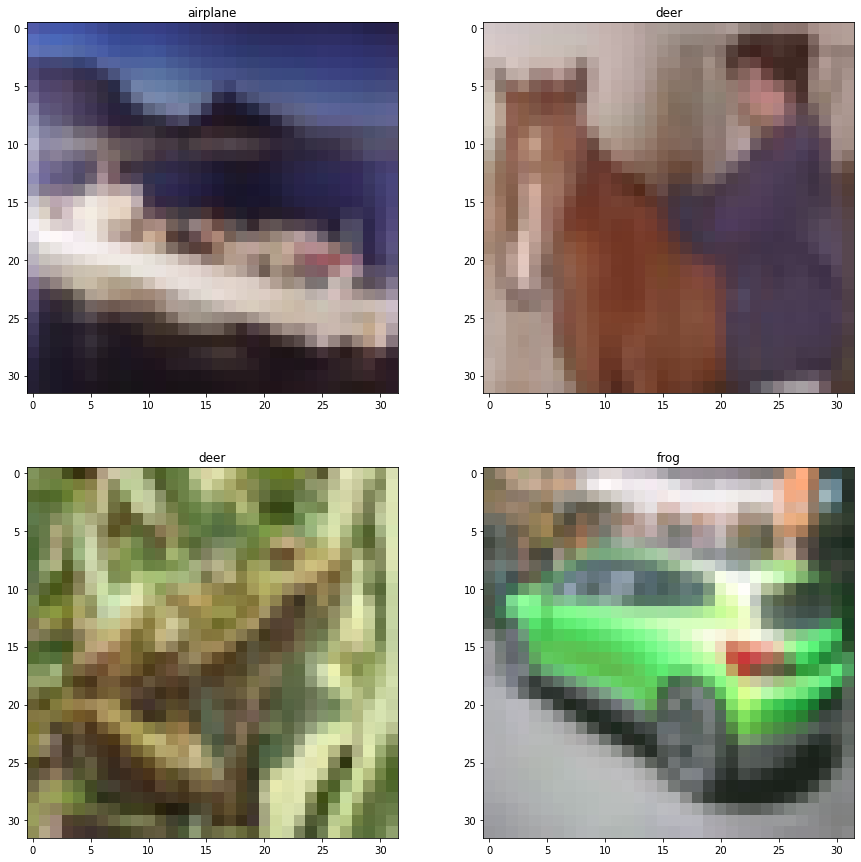

In [78]:
plot(X=X_test[y_pred != y_test], y=y_pred[y_pred != y_test])

#### CNN

#####  Hyper parameter tunning
Defining the parameter for the tunning parameters

param_grid_cnn = [

  { 'k_size': [2, 4], 
    "act" : ["relu", "elu"],
   'filter1': [128],
   'filter2': [256],
   'filter3' :[128]
  },
  
  { 'k_size': [2, 4], 
    "act" : ["relu", "elu"],
   'filter1': [256],
   'filter2': [364],
   'filter3' :[256]
  },
 ]



Wrap the model to allow for parameter tuning using grid search.

model_cnn = keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model_cnn, epochs=100)

from sklearn.model_selection import GridSearchCV
grid_cnn = GridSearchCV(estimator=model_cnn, param_grid=param_grid_cnn, cv=3)

grid_cnn.fit(X_train,y_train)

grid_cnn.best_params_

best parameters
* activation function - relu
* Kernel size 2
* Number of fitlers 256, 364, 256 for the three convolution layers respectively.


In [174]:
root_logdir = os.path.join(os.curdir, "my_logs_cnn")
run_logdir = get_run_logdir() # e.g., ’./my_logs/run_2020_04_17-15_15_22’
# Build and compile your model
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)


Epoch 1/100
1563/1563 [==============================] - 34s 21ms/step - loss: 2.2554 - accuracy: 0.2436 - val_loss: 1.7488 - val_accuracy: 0.3816
Epoch 2/100
1563/1563 [==============================] - 33s 21ms/step - loss: 1.7200 - accuracy: 0.3953 - val_loss: 1.6010 - val_accuracy: 0.4356
Epoch 3/100
1563/1563 [==============================] - 33s 21ms/step - loss: 1.5850 - accuracy: 0.4468 - val_loss: 1.5148 - val_accuracy: 0.4606
Epoch 4/100
1563/1563 [==============================] - 33s 21ms/step - loss: 1.4986 - accuracy: 0.4764 - val_loss: 1.4496 - val_accuracy: 0.4926
Epoch 5/100
1563/1563 [==============================] - 33s 21ms/step - loss: 1.4356 - accuracy: 0.4961 - val_loss: 1.4086 - val_accuracy: 0.5013
Epoch 6/100
1563/1563 [==============================] - 33s 21ms/step - loss: 1.3944 - accuracy: 0.5112 - val_loss: 1.3674 - val_accuracy: 0.5214
Epoch 7/100
1563/1563 [==============================] - 33s 21ms/step - loss: 1.3538 - accuracy: 0.5304 - val_loss: 1

1563/1563 [==============================] - 33s 21ms/step - loss: 0.8944 - accuracy: 0.6970 - val_loss: 1.0239 - val_accuracy: 0.6385
Epoch 57/100
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8882 - accuracy: 0.6986 - val_loss: 1.0110 - val_accuracy: 0.6435
Epoch 58/100
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8819 - accuracy: 0.6996 - val_loss: 1.0120 - val_accuracy: 0.6405
Epoch 59/100
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8817 - accuracy: 0.6992 - val_loss: 1.0094 - val_accuracy: 0.6474
Epoch 60/100
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8869 - accuracy: 0.6972 - val_loss: 1.0078 - val_accuracy: 0.6506
Epoch 61/100
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8805 - accuracy: 0.7011 - val_loss: 1.0059 - val_accuracy: 0.6458
Epoch 62/100
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8853 - accuracy: 0.6973 - val_loss: 1.0100 

In [195]:

try:
    best_cnn = keras.models.load_model("Sigar_Sigar_cnn.h5")
    history_cnn = best_cnn.fit(X_train, y_train, epochs = 1,  validation_data=(X_val, y_val) ,
                           callbacks=[lr_scheduler_90, tensorboard_cb])
        
except OSError:
    if len(tf.config.list_physical_devices('GPU')):
        with tf.device(tf.test.gpu_device_name()):    
            best_cnn = create_model_cnn(k_size=2, act="relu",filter1=256,filter2=364,filter3=256 )
            history_cnn = best_cnn.fit(X_train, y_train, epochs = 100,  validation_data=(X_val, y_val) ,
                                   callbacks=[lr_scheduler_90, tensorboard_cb])
    else:
        best_cnn = create_model_cnn(k_size=2, act="relu",filter1=256,filter2=364,filter3=256 )
        history_cnn = best_cnn.fit(X_train, y_train, epochs = 100,  validation_data=(X_val, y_val) ,
                               callbacks=[lr_scheduler_90, tensorboard_cb])

1563/1563 [==============================] - 34s 21ms/step - loss: 0.8571 - accuracy: 0.7086 - val_loss: 1.0141 - val_accuracy: 0.6506


In [143]:
best_cnn.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 256)       3328      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 16, 16, 364)       373100    
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 8, 8, 364)         0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 8, 8, 256)         372992    
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 4, 4, 256)         0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 4096)             

In [100]:
best_cnn.save("Sigar_Sigar_cnn.h5")

### Model evaluation

In [58]:
import numpy as np
y_pred_cnn = np.argmax(best_cnn.predict(X_test), axis=-1)

In [104]:
from sklearn.metrics import classification_report
c_report_cnn = classification_report(y_test, y_pred_cnn, target_names=class_names)
print(c_report_cnn)

              precision    recall  f1-score   support

    airplane       0.66      0.72      0.69       138
  automobile       0.74      0.76      0.75       148
        bird       0.50      0.57      0.53       148
         cat       0.50      0.53      0.51       157
        deer       0.66      0.56      0.60       134
         dog       0.55      0.57      0.56       135
        frog       0.74      0.70      0.72       160
       horse       0.78      0.66      0.72       167
        ship       0.81      0.78      0.79       151
       truck       0.72      0.73      0.72       162

    accuracy                           0.66      1500
   macro avg       0.66      0.66      0.66      1500
weighted avg       0.67      0.66      0.66      1500



Genereally speaking the model is correct around 2/3 rd of  the time with especially poor perfomance when detecting birds, cats, and dogs.

<AxesSubplot:>

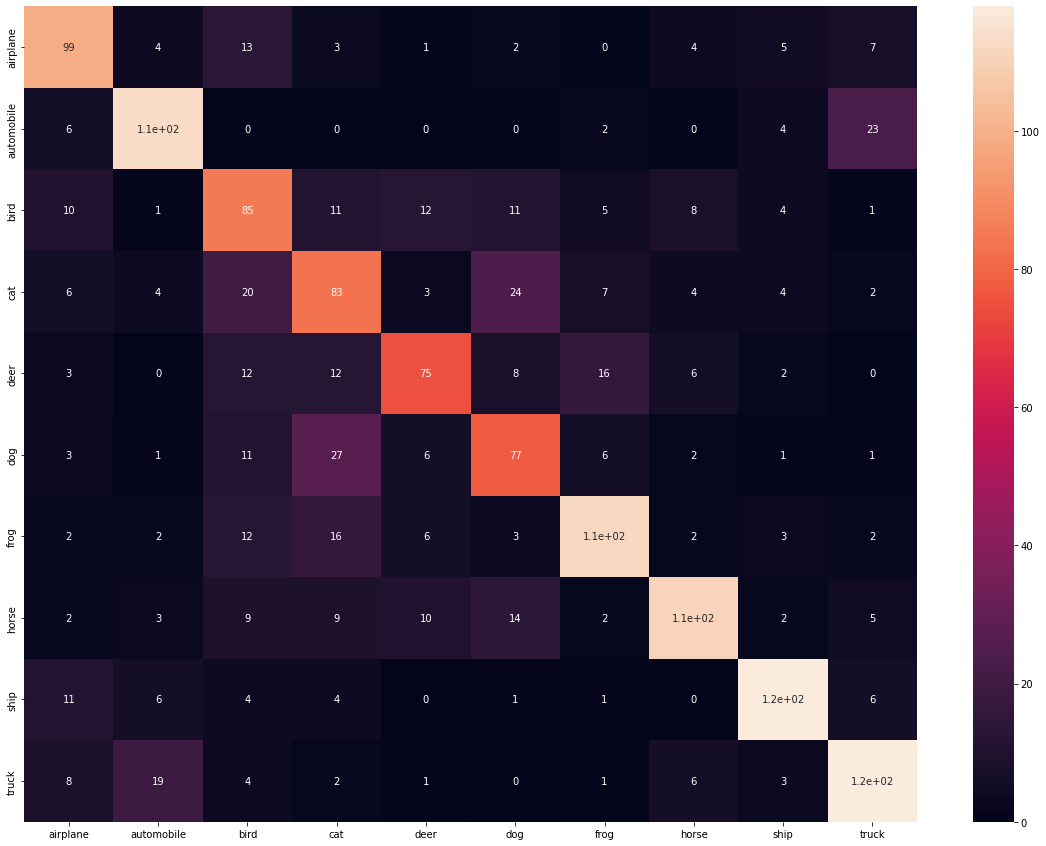

In [108]:
from sklearn.metrics import confusion_matrix
conf_mat_cnn = confusion_matrix(y_test, y_pred_cnn)
fig, ax = plt.subplots(figsize=(20,15)) 
# using absolute value
sns.heatmap(conf_mat_cnn, annot= True, xticklabels = class_names, yticklabels= class_names)

The trend observed for the mlp is also observed for the cnn but to a lesser extent. Ships and truck are the most well identified classes whilst dogs, cats and birds are the worst. Moreover, animals tend to get misclassified as other animals more often than machines. E.G. cats are often misclassifies as dogs or birds, and dogs as cats. Additionally, machines tend to be misclassifed as other machine more often than animals E.G.  automobiles as truck and trucks as Automobiles.
For fasle postives, birds, cats and dogs are the most misclassidied class, where as ships fall on the bottom of the list.
With regards to false negatives, cats and birds top the list for most misclassified class whilst ships are the least misclassified class as well.

##### Correctly identified classes plot

C:\Users\jcary\AppData\Local\Temp\ipykernel_14224\348054402.py:7: DeprecationWarning: This function is deprecated. Please call randint(0, 991 + 1) instead
  random_set = ran.random_integers(0,len(y),num_portraits)


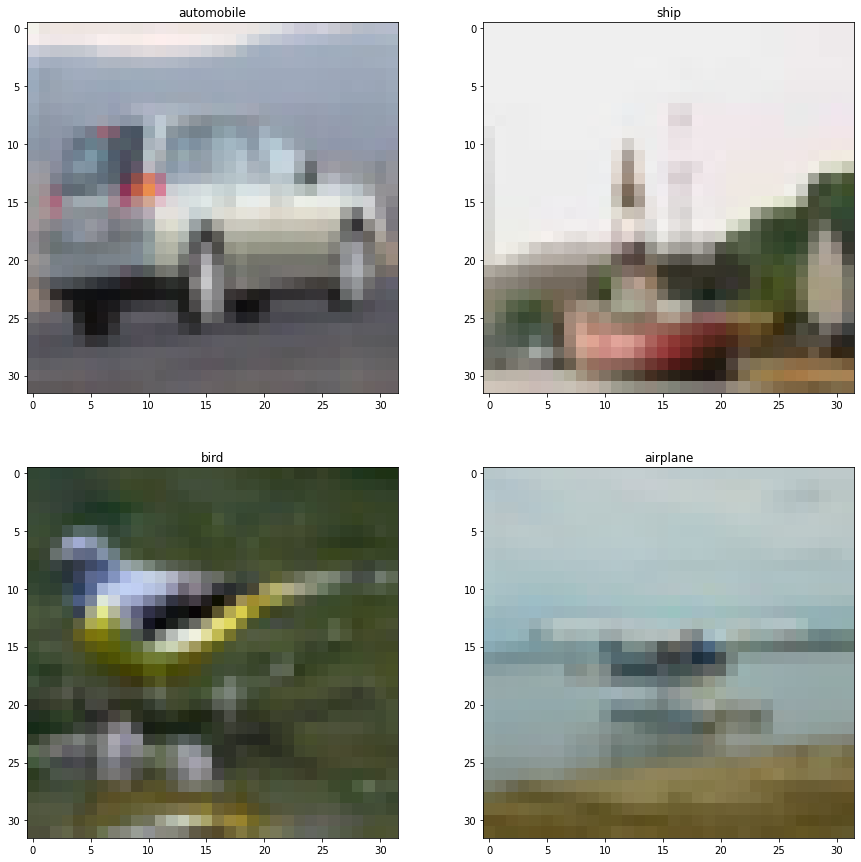

In [80]:
plot(X=X_test[y_pred_cnn == y_test], y=y_pred_cnn[y_pred_cnn == y_test])

##### Incorrectly identified classes plot

C:\Users\jcary\AppData\Local\Temp\ipykernel_14224\348054402.py:7: DeprecationWarning: This function is deprecated. Please call randint(0, 509 + 1) instead
  random_set = ran.random_integers(0,len(y),num_portraits)


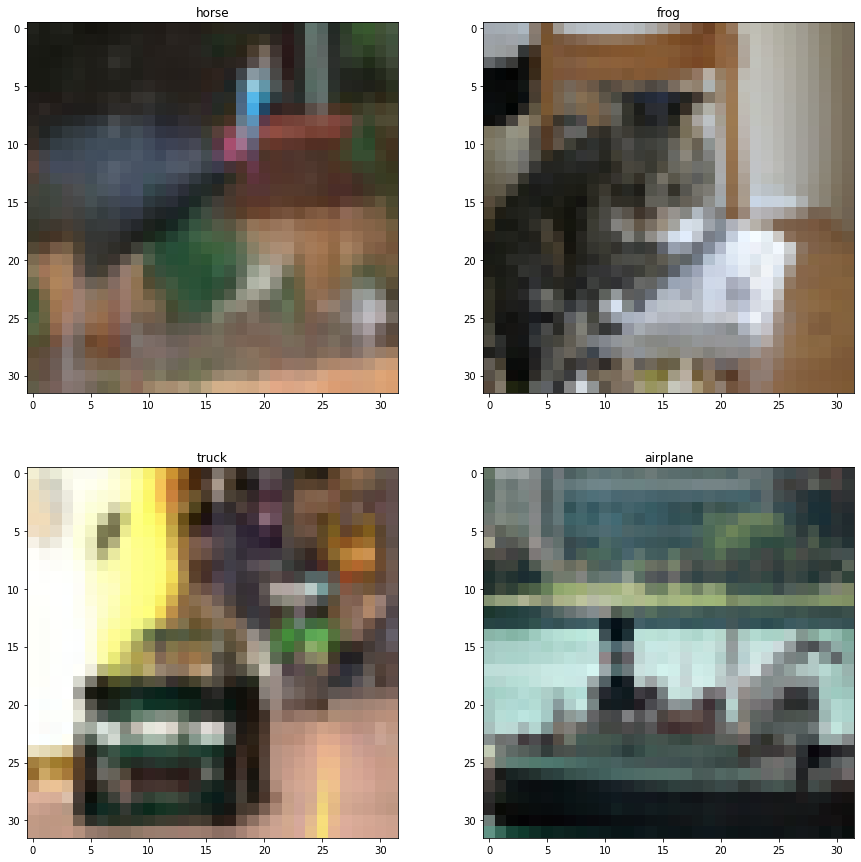

In [81]:
plot(X=X_test[y_pred_cnn != y_test], y=y_pred_cnn[y_pred_cnn != y_test])

### Model comparison

##### Model Complexity and Computation time

In [190]:
print(f"{best_MLP.summary()}{best_cnn.summary()}")

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 3072)              0         
_________________________________________________________________
dense_34 (Dense)             (None, 300)               921900    
_________________________________________________________________
dropout_17 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 100)               30100     
_________________________________________________________________
dropout_18 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 100)             

MLP has 963,110 trainable parameters while the cnn has 1,283,574. Thus, cnn is more complex and accordingly, takes more time to train 55 minutes on the GPU GEFORCE RTX 2060  as opposed to the MLP's

##### Classification Performance

In [145]:
print(f"MLP { c_report_mlp} \n\n CNN {c_report_cnn}")

MLP               precision    recall  f1-score   support

    airplane       0.59      0.55      0.57       138
  automobile       0.75      0.57      0.65       148
        bird       0.36      0.35      0.36       148
         cat       0.40      0.35      0.37       157
        deer       0.35      0.56      0.43       134
         dog       0.44      0.33      0.38       135
        frog       0.46      0.59      0.52       160
       horse       0.69      0.52      0.59       167
        ship       0.65      0.76      0.70       151
       truck       0.60      0.57      0.58       162

    accuracy                           0.52      1500
   macro avg       0.53      0.52      0.52      1500
weighted avg       0.53      0.52      0.52      1500
 

 CNN               precision    recall  f1-score   support

    airplane       0.66      0.72      0.69       138
  automobile       0.74      0.76      0.75       148
        bird       0.50      0.57      0.53       148
         cat 

Generally the CNN performs better than the MLP where, the CNN is able to correctly identify the correct class 2/3 time as compared to the MLP's 50% success rate. More importantly, there is a marked improvement for precision and recal on all classes. There isn't a single class where the MLP outperforms the CNN on the f1_score. Thus, the CNN is generally a better model. This is an expected result since the CNN is able to extract more features from the photo than a plain MLP and thus will be able to use more information for classifyin the different images.

<AxesSubplot:title={'center':'CNN Heatmap'}>

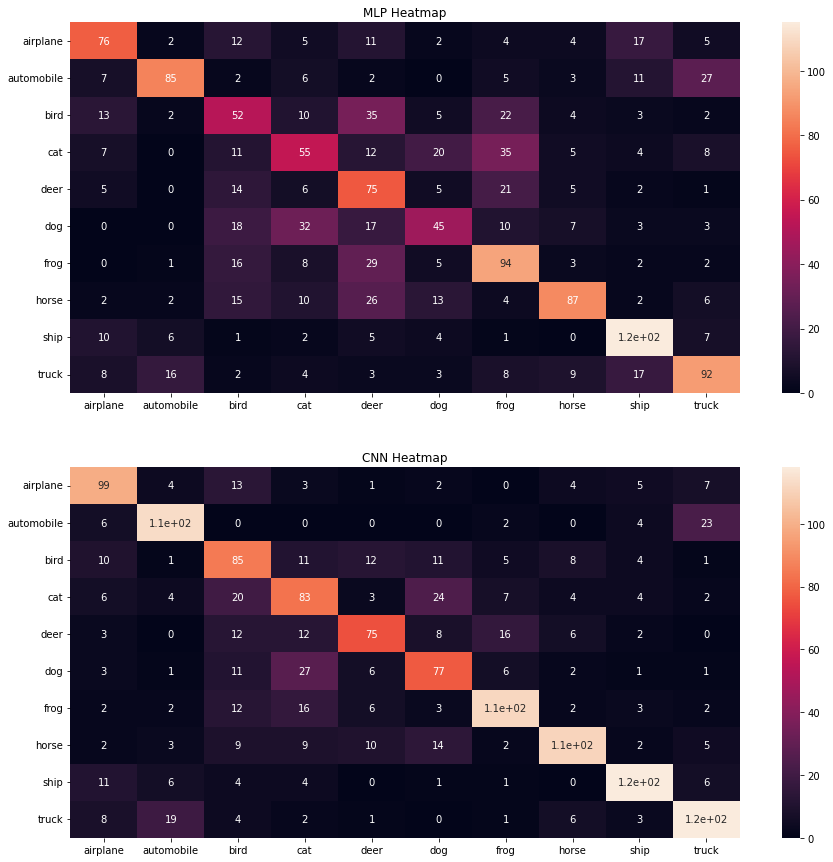

In [134]:

fig, (ax1,ax2) = plt.subplots(2,figsize=(15,15))


# using absolute value
ax1.set_title("MLP Heatmap")
sns.heatmap(ax=ax1, data = conf_mat, annot= True, xticklabels = class_names, yticklabels= class_names)
ax2.set_title("CNN Heatmap")
sns.heatmap(ax= ax2,data = conf_mat_cnn, annot= True, xticklabels = class_names, yticklabels= class_names)

The CNN model improves accuracy in all classes except the dear category, where the accuracy remained constantand false negatives, although attributed to different classes, did not chang in total numbers. This is supported by a constant recall value of 0.56